## 서포트 벡터 머신 (Support Vector Machine, SVM)

- 복잡한 분류 문제에 적합하다.
- 선형, 비선형 분류 모두 사용할 수 있다.
- 회귀에 사용할 수도 있다.
- 이진 분류만 가능하다. (이진 분류기를 통해 다중 클래스를 분류하는 기법도 있음)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/devdio/datasets/main/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


- Pregnancies (임신 횟수): 해당 환자의 임신 횟수를 나타냅니다.

- Glucose (글루코스): 포도당 농도를 나타내는데, 공복 상태의 환자의 혈장 포도당 농도를 밀리그램 단위로 측정한 값입니다.

- BloodPressure (혈압): 환자의 이완기 혈압을 밀리미터 수은柱 (mm Hg)로 나타냅니다.

- SkinThickness (피부 두께): 상완 삼두근 부분의 피부 주름 두께를 밀리미터 단위로 측정한 값입니다.

- Insulin (인슐린): 2시간 동안의 혈청 인슐린 농도를 μU/ml (마이크로 유닛/밀리리터)로 측정한 값입니다.

- BMI (체질량 지수): 체중과 키를 고려하여 계산된 체질량 지수로, 무게(kg)를 키(m)의 제곱으로 나눈 값입니다.

- DiabetesPedigreeFunction (당뇨 가계도 함수): 당뇨병 가족력을 고려하여 계산된 값으로, 가족력이 높을수록 높은 값을 갖습니다.

- Age (나이): 환자의 나이를 나타냅니다.







In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

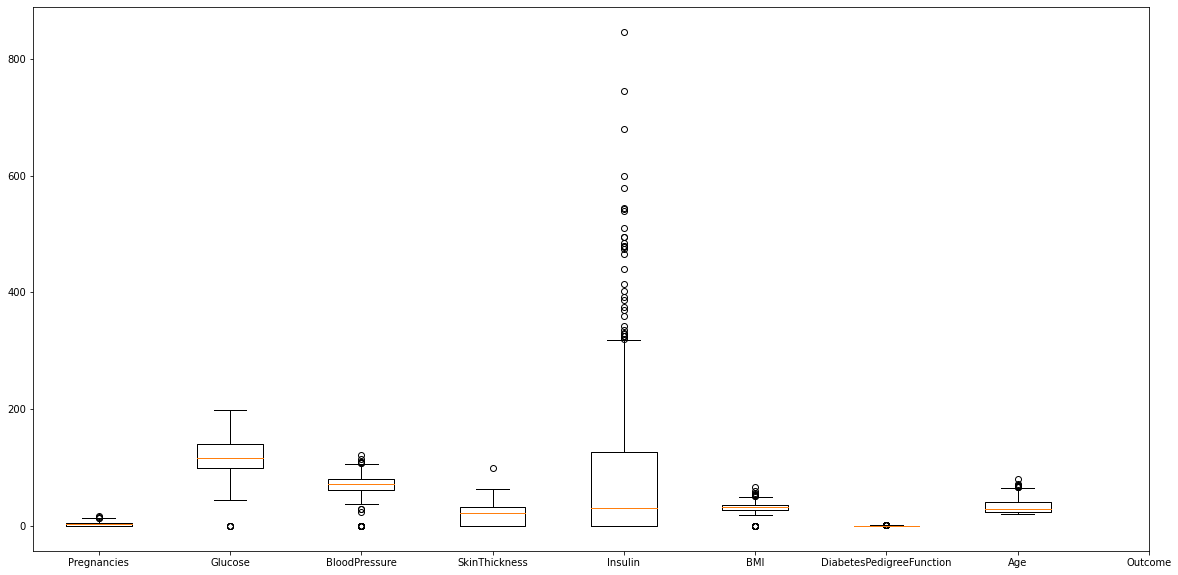

In [36]:
plt.figure(figsize=(20, 10))
plt.boxplot(df.drop('Outcome', axis=1))

plt.xticks(labels=df.columns,ticks=np.arange(1, len(df.columns)+1)) 
plt.show()

## Train Test Split

In [78]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(X_train.shape, X_test.shape, X_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)

(460, 8) (154, 8) (154, 8)
(460,) (154,) (154,)


In [40]:
X_train:pd.DataFrame = X_train
X_val:pd.DataFrame = X_val
X_test:pd.DataFrame = X_test
y_train:pd.Series = y_train
y_val:pd.Series = y_val
y_test:pd.Series = y_test


In [79]:
to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']
X_train[to_replace] = X_train[to_replace].replace(0, np.nan)
X_val[to_replace] = X_val[to_replace].replace(0, np.nan)
X_test[to_replace] = X_test[to_replace].replace(0, np.nan)

print(X_train.isnull().sum())
print(X_val.isnull().sum())
print(X_test.isnull().sum())

Pregnancies                   0
Glucose                       3
BloodPressure                19
SkinThickness               136
Insulin                     222
BMI                           8
DiabetesPedigreeFunction      0
Age                           0
dtype: int64
Pregnancies                  0
Glucose                      0
BloodPressure                8
SkinThickness               47
Insulin                     77
BMI                          3
DiabetesPedigreeFunction     0
Age                          0
dtype: int64
Pregnancies                  0
Glucose                      2
BloodPressure                8
SkinThickness               44
Insulin                     75
BMI                          0
DiabetesPedigreeFunction     0
Age                          0
dtype: int64


In [80]:
X_train_medians = X_train.median()
X_train_medians

Pregnancies                   3.0000
Glucose                     116.0000
BloodPressure                72.0000
SkinThickness                29.0000
Insulin                     122.0000
BMI                          32.1500
DiabetesPedigreeFunction      0.3825
Age                          29.0000
dtype: float64

In [81]:
for column in to_replace:
    X_train[column].fillna(X_train_medians[column], inplace=True)
    X_val[column].fillna(X_train_medians[column], inplace=True)
    X_test[column].fillna(X_train_medians[column], inplace=True)

print(X_train.isna().sum())
print(X_val.isna().sum())
print(X_test.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


In [82]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [92]:
best_model = {
    'accuracy': 0
}

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# xgboost
from xgboost import XGBClassifier

lr_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [100, 200, 500]}

svc_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'max_iter': [100, 200, 500]}

rf_params = {'n_estimators': [10, 50, 100, 200, 500], 'max_depth': [1, 3, 5, 7, 9, 11, 13, 15]}

xgb_params = {'n_estimators': [10, 50, 100, 200, 500], 'max_depth': [1, 3, 5, 7, 9, 11, 13, 15]}

params = [lr_params, svc_params, rf_params, xgb_params]

# LogisticRegression

print("LogisticRegression")

for C in lr_params['C']:
    for max_iter in lr_params['max_iter']:
        lr = LogisticRegression(C=C, penalty='l2', max_iter=max_iter)
        lr.fit(X_train, y_train)
        accuracy = lr.score(X_val, y_val)
        if accuracy > best_model['accuracy']:
            best_model['accuracy'] = accuracy
            best_model['model'] = lr
            best_model['params'] = {'C': C, 'max_iter': max_iter}

            print("=" * 30)
            print("New best model found!")
            print("LogisticRegression")
            print(f"Accuracy: {accuracy}")
            print(f"C: {C}")
            print(f"max_iter: {max_iter}")
            print("=" * 30, end="\n\n")
        


# SVC

print("SVC")

for C in svc_params['C']:
    for kernel in svc_params['kernel']:
        for max_iter in svc_params['max_iter']:
            svc = SVC(C=C, kernel=kernel, max_iter=max_iter)
            svc.fit(X_train, y_train)
            accuracy = svc.score(X_val, y_val)
            if accuracy > best_model['accuracy']:
                best_model['accuracy'] = accuracy
                best_model['model'] = svc
                best_model['params'] = {'C': C, 'kernel': kernel, 'max_iter': max_iter}

                print("=" * 30)
                print("New best model found!")
                print("SVC")
                print(f"Accuracy: {accuracy}")
                print(f"C: {C}")
                print(f"max_iter: {max_iter}")
                print(f"Kernel: {kernel}")
                print("=" * 30, end="\n\n")


# RandomForestClassifier

print("RandomForestClassifier")

for n_estimators in rf_params['n_estimators']:
    for max_depth in rf_params['max_depth']:
        rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
        rf.fit(X_train, y_train)
        accuracy = rf.score(X_val, y_val)
        if accuracy > best_model['accuracy']:
            best_model['accuracy'] = accuracy
            best_model['model'] = rf
            best_model['params'] = {'n_estimators': n_estimators, 'max_depth': max_depth}

            print("=" * 30)
            print("New best model found!")
            print("RandomForestClassifier")
            print(f"Accuracy: {accuracy}")
            print(f"n_estimators: {n_estimators}")
            print(f"max_depth: {max_depth}")
            print("=" * 30, end="\n\n")


# XGBClassifier

print("XGBClassifier")

for n_estimators in xgb_params['n_estimators']:
    for max_depth in xgb_params['max_depth']:
        xgb = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth)
        xgb.fit(X_train, y_train)
        accuracy = xgb.score(X_val, y_val)
        if accuracy > best_model['accuracy']:
            best_model['accuracy'] = accuracy
            best_model['model'] = xgb
            best_model['params'] = {'n_estimators': n_estimators, 'max_depth': max_depth}

            print("=" * 30)
            print("New best model found!")
            print("XGBClassifier")
            print(f"Accuracy: {accuracy}")
            print(f"n_estimators: {n_estimators}")
            print(f"max_depth: {max_depth}")
            print("=" * 30, end="\n\n")


print("=" * 30)
print("Best Model: ", best_model['model'].__class__.__name__)
print("Best Params: ", best_model['params'])
print("Best Accuracy: ", best_model['accuracy'])


LogisticRegression
New best model found!
LogisticRegression
Accuracy: 0.6558441558441559
C: 0.001
max_iter: 100

New best model found!
LogisticRegression
Accuracy: 0.7272727272727273
C: 0.01
max_iter: 100

New best model found!
LogisticRegression
Accuracy: 0.7337662337662337
C: 0.1
max_iter: 100

New best model found!
LogisticRegression
Accuracy: 0.7402597402597403
C: 1
max_iter: 100

SVC
New best model found!
SVC
Accuracy: 0.7532467532467533
C: 0.01
max_iter: 200
Kernel: linear

RandomForestClassifier
XGBClassifier
New best model found!
XGBClassifier
Accuracy: 0.7597402597402597
n_estimators: 10
max_depth: 13

Best Model:  XGBClassifier
Best Params:  {'n_estimators': 10, 'max_depth': 13}
Best Accuracy:  0.7597402597402597


In [93]:
# best model

_best_model = best_model['model']
_best_model.fit(X_train, y_train)
accuracy = _best_model.score(X_test, y_test)
print("Accuracy: ", accuracy)


Accuracy:  0.7207792207792207


In [94]:
svc = SVC(C=0.01, kernel='linear', max_iter=200) 
svc.fit(X_train, y_train)
accuracy = svc.score(X_test, y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.7467532467532467


In [103]:
# GridSearchCV - SCV

from sklearn.model_selection import GridSearchCV

svc_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
    'max_iter': [100, 200, 500, 1000, 2000],
    'gamma': [0.01, 0.1, 1, 10, 100],
    'degree': [1, 2, 3, 4, 5]
}
grid = GridSearchCV(SVC(), svc_params,cv=5, refit=True, n_jobs=-1, scoring='f1')
grid.fit(X_train, y_train)
print("Best Params: ", grid.best_params_)
print("Best Score: ", grid.best_score_)
print("Best Estimator: ", grid.best_estimator_)
print("Test Score: ", grid.score(X_test, y_test))

/Users/my_home/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/my_home/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/my_home/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/my_home/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with S

Best Params:  {'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': 100}
Best Score:  0.6901473942569833
Best Estimator:  SVC(C=0.1, degree=1, gamma=0.1, max_iter=100)
Test Score:  0.6984126984126984


/Users/my_home/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/my_home/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/my_home/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/my_home/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with

In [104]:
# Best Estimator

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

grid.best_estimator_.fit(X_train, y_train)
y_pred = grid.best_estimator_.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1: ", f1_score(y_test, y_pred))

Accuracy:  0.7532467532467533
Precision:  0.6111111111111112
Recall:  0.8148148148148148
F1:  0.6984126984126984


In [106]:
# 모델 내보내기

import pickle

pickle.dump(grid.best_estimator_, open('diabetes_model.pkl', 'wb'))

In [107]:
# 모델 불러오기

model:SVC = pickle.load(open('diabetes_model.pkl', 'rb'))
y_pred = grid.best_estimator_.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1: ", f1_score(y_test, y_pred))

Accuracy:  0.7532467532467533
Precision:  0.6111111111111112
Recall:  0.8148148148148148
F1:  0.6984126984126984


In [112]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

knn_params = {
    'n_neighbors': [x for x in range(1, 51) if x % 2 == 1],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
}

grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, refit=True, n_jobs=-1, scoring='f1')
grid.fit(X_train, y_train)
print("Best Params: ", grid.best_params_)

Best Params:  {'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'distance'}


In [111]:
grid.best_estimator_.fit(X_train, y_train)
y_pred = grid.best_estimator_.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1: ", f1_score(y_test, y_pred))

Accuracy:  0.7597402597402597
Precision:  0.6888888888888889
Recall:  0.5740740740740741
F1:  0.6262626262626262
